In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src/data/')
sys.path.append('../src/models/')
sys.path.append('../src/features/')
sys.path.append('../src/visualization/')
# will reload any library
%load_ext autoreload
%autoreload 2

In [9]:
from data.metrics_track import r_precision, cosine_sim_closest, cosine_sim_top, NDCG
from visualization.plot_utils import write_latex_table, summary_pooling_table, pooling_plots, pandas_settings, plot_settings
# general
import pandas as pd
import numpy as np
from tqdm import tqdm
from features.tracks_info import TrackInfo
from collections import OrderedDict
from itertools import product
from data_utils import product_size

plot_settings()
pandas_settings()

# create pooling model

In [3]:
from models.word2vec_pooler import W2VPooler

pooler =  W2VPooler(verbose=False)
tracks = TrackInfo(subset='5k-')
list_s = [('The Scientist','Coldplay'),('Immigrant Song','Led Zeppelin'),('T.N.T.','AC/DC')]
seeds_t = [tracks.track_info2uris(tname,aname)[0] for tname,aname in list_s]
pool, dist= pooler.recommend(seeds_t,n=500,agg_strat='mean')

# test over metrics
## one playlist

In [5]:
ks = [1, 5, 10, 25, 100]
stats=[]
pid = 194
n_pick = 1000
strat='mean'
for k in ks:
    pl_turi,pl_auri = tracks.get_playlist(pid)
    seeds_t = pl_turi[:k]
    true_t,true_a = pl_turi[k:],pl_auri[k:]
    pool_t, dist= pooler.recommend(seeds_t,n=n_pick,agg_strat=strat)
    pool_a = [tracks.turi2auri[t] for t in pool_t]
    r_t = r_precision(true_t, pool_t)
    r_a = r_precision(true_a, pool_a)
    stats.append(OrderedDict([('pid',pid),('k',k),('strat',strat),('n',n_pick),('r_tracks',r_t),('r_artist',r_a)]))
pd.DataFrame(stats)

,pid,k,strat,n,r_tracks,r_artist
0,194,1,mean,1000,0.124031,0.217054
1,194,5,mean,1000,0.432000,0.480000
2,194,10,mean,1000,0.283333,0.383333
3,194,25,mean,1000,0.333333,0.419048
4,194,100,mean,1000,0.266667,0.366667


# several random playlists

In [6]:
ks = [1, 5, 10, 25, 100]
stats=[]
pids = [i for i in np.random.randint(0,5000,250)]
n_picks = [1000]
strats=['mean']
product_n = product_size([ks,pids,n_picks,strats])
#for pid in :
for combo in tqdm(product(*[ks,pids,n_picks,strats]),total=product_n):
    try:
        k,pid,n_pick,strat = combo
        pl_turi,pl_auri = tracks.get_playlist(pid)
        seeds_t = pl_turi[:k]
        true_t,true_a = pl_turi[k:],pl_auri[k:]
        pool_t, dist= pooler.recommend(seeds_t,n=n_pick,agg_strat=strat)
        pool_a = [tracks.turi2auri[t] for t in pool_t]
        r_t = r_precision(true_t, pool_t)
        r_a = r_precision(true_a, pool_a)
        stats.append(OrderedDict([('pid',pid),('k',k),('strategy',strat),('n',n_pick),('r-tracks',r_t),('r-artist',r_a)]))
    except:
        print('Error with {}'.format(combo))

  0%|          | 0/1250 [00:00<?, ?it/s]/home/beangoben/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/beangoben/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 3/1250 [00:00<00:51, 24.31it/s]

Error with (1, 4557, 1000, 'mean')


 11%|█         | 132/1250 [00:08<01:13, 15.23it/s]

Error with (1, 3934, 1000, 'mean')


 12%|█▏        | 151/1250 [00:09<01:11, 15.36it/s]

Error with (1, 4619, 1000, 'mean')


 17%|█▋        | 212/1250 [00:13<01:07, 15.34it/s]

Error with (1, 1123, 1000, 'mean')


 35%|███▍      | 434/1250 [00:28<00:53, 15.23it/s]

Error with (5, 1524, 1000, 'mean')


 35%|███▌      | 440/1250 [00:28<00:53, 15.25it/s]

Error with (5, 3106, 1000, 'mean')


 40%|████      | 502/1250 [00:32<00:49, 15.24it/s]

Error with (10, 4557, 1000, 'mean')


 41%|████      | 514/1250 [00:33<00:48, 15.22it/s]

Error with (10, 2030, 1000, 'mean')


 46%|████▌     | 574/1250 [00:37<00:44, 15.22it/s]

Error with (10, 3221, 1000, 'mean')


 51%|█████     | 640/1250 [00:42<00:40, 15.24it/s]

Error with (10, 1024, 1000, 'mean')


 52%|█████▏    | 648/1250 [00:42<00:39, 15.22it/s]

Error with (10, 1399, 1000, 'mean')


 53%|█████▎    | 658/1250 [00:43<00:38, 15.22it/s]

Error with (10, 3347, 1000, 'mean')


 54%|█████▍    | 678/1250 [00:44<00:37, 15.21it/s]

Error with (10, 4348, 1000, 'mean')


 55%|█████▍    | 684/1250 [00:44<00:37, 15.20it/s]

Error with (10, 1524, 1000, 'mean')


 55%|█████▌    | 690/1250 [00:45<00:36, 15.20it/s]

Error with (10, 3106, 1000, 'mean')


 60%|██████    | 754/1250 [00:49<00:32, 15.34it/s]

Error with (25, 4557, 1000, 'mean')
Error with (25, 2840, 1000, 'mean')


 61%|██████    | 758/1250 [00:49<00:32, 15.35it/s]

Error with (25, 1051, 1000, 'mean')


 61%|██████    | 764/1250 [00:49<00:31, 15.36it/s]

Error with (25, 2030, 1000, 'mean')


 62%|██████▏   | 772/1250 [00:50<00:31, 15.36it/s]

Error with (25, 571, 1000, 'mean')
Error with (25, 1093, 1000, 'mean')


 62%|██████▏   | 780/1250 [00:50<00:30, 15.38it/s]

Error with (25, 3331, 1000, 'mean')
Error with (25, 4044, 1000, 'mean')


 63%|██████▎   | 788/1250 [00:51<00:30, 15.37it/s]

Error with (25, 3432, 1000, 'mean')


 63%|██████▎   | 792/1250 [00:51<00:29, 15.37it/s]

Error with (25, 1031, 1000, 'mean')


 64%|██████▍   | 798/1250 [00:51<00:29, 15.37it/s]

Error with (25, 2922, 1000, 'mean')


 64%|██████▍   | 804/1250 [00:52<00:29, 15.37it/s]

Error with (25, 2582, 1000, 'mean')
Error with (25, 2508, 1000, 'mean')


 65%|██████▍   | 808/1250 [00:52<00:28, 15.36it/s]

Error with (25, 111, 1000, 'mean')
Error with (25, 2823, 1000, 'mean')


 66%|██████▌   | 820/1250 [00:53<00:27, 15.36it/s]

Error with (25, 4343, 1000, 'mean')


 66%|██████▌   | 824/1250 [00:53<00:27, 15.34it/s]

Error with (25, 3221, 1000, 'mean')


 67%|██████▋   | 842/1250 [00:54<00:26, 15.32it/s]

Error with (25, 2821, 1000, 'mean')
Error with (25, 3432, 1000, 'mean')


 68%|██████▊   | 846/1250 [00:55<00:26, 15.32it/s]

Error with (25, 2618, 1000, 'mean')


 68%|██████▊   | 852/1250 [00:55<00:26, 15.31it/s]

Error with (25, 4216, 1000, 'mean')
Error with (25, 2867, 1000, 'mean')


 68%|██████▊   | 856/1250 [00:55<00:25, 15.30it/s]

Error with (25, 3537, 1000, 'mean')
Error with (25, 3985, 1000, 'mean')


 69%|██████▉   | 862/1250 [00:56<00:25, 15.29it/s]

Error with (25, 3507, 1000, 'mean')
Error with (25, 1770, 1000, 'mean')


 69%|██████▉   | 864/1250 [00:56<00:25, 15.29it/s]

Error with (25, 4821, 1000, 'mean')
Error with (25, 1657, 1000, 'mean')


 71%|███████   | 882/1250 [00:57<00:24, 15.27it/s]

Error with (25, 3934, 1000, 'mean')


 71%|███████   | 886/1250 [00:58<00:23, 15.27it/s]

Error with (25, 1416, 1000, 'mean')


 71%|███████   | 890/1250 [00:58<00:23, 15.27it/s]

Error with (25, 1024, 1000, 'mean')


 72%|███████▏  | 896/1250 [00:58<00:23, 15.26it/s]

Error with (25, 4277, 1000, 'mean')
Error with (25, 1399, 1000, 'mean')


 72%|███████▏  | 904/1250 [00:59<00:22, 15.26it/s]

Error with (25, 3740, 1000, 'mean')


 73%|███████▎  | 908/1250 [00:59<00:22, 15.25it/s]

Error with (25, 3347, 1000, 'mean')


 73%|███████▎  | 912/1250 [00:59<00:22, 15.25it/s]

Error with (25, 222, 1000, 'mean')
Error with (25, 746, 1000, 'mean')


 74%|███████▍  | 922/1250 [01:00<00:21, 15.24it/s]

Error with (25, 2019, 1000, 'mean')


 74%|███████▍  | 926/1250 [01:00<00:21, 15.24it/s]

Error with (25, 4982, 1000, 'mean')
Error with (25, 4348, 1000, 'mean')


 75%|███████▍  | 934/1250 [01:01<00:20, 15.22it/s]

Error with (25, 1524, 1000, 'mean')


 75%|███████▌  | 938/1250 [01:01<00:20, 15.22it/s]

Error with (25, 1139, 1000, 'mean')
Error with (25, 3106, 1000, 'mean')


 76%|███████▌  | 952/1250 [01:02<00:19, 15.21it/s]

Error with (25, 3045, 1000, 'mean')
Error with (25, 2402, 1000, 'mean')


 76%|███████▋  | 956/1250 [01:02<00:19, 15.21it/s]

Error with (25, 1131, 1000, 'mean')
Error with (25, 2722, 1000, 'mean')


 77%|███████▋  | 960/1250 [01:03<00:19, 15.21it/s]

Error with (25, 571, 1000, 'mean')


 77%|███████▋  | 966/1250 [01:03<00:18, 15.21it/s]

Error with (25, 1917, 1000, 'mean')


 78%|███████▊  | 970/1250 [01:03<00:18, 15.21it/s]

Error with (25, 2985, 1000, 'mean')


 78%|███████▊  | 974/1250 [01:04<00:18, 15.21it/s]

Error with (25, 177, 1000, 'mean')


 78%|███████▊  | 976/1250 [01:04<00:18, 15.20it/s]

Error with (25, 2085, 1000, 'mean')


 79%|███████▉  | 988/1250 [01:05<00:17, 15.20it/s]

Error with (25, 1717, 1000, 'mean')


 80%|███████▉  | 998/1250 [01:05<00:16, 15.19it/s]

Error with (25, 871, 1000, 'mean')


 80%|████████  | 1002/1250 [01:05<00:16, 15.20it/s]

Error with (100, 4557, 1000, 'mean')
Error with (100, 4738, 1000, 'mean')


 80%|████████  | 1006/1250 [01:06<00:16, 15.20it/s]

Error with (100, 2840, 1000, 'mean')
Error with (100, 2404, 1000, 'mean')
Error with (100, 1051, 1000, 'mean')


 81%|████████  | 1008/1250 [01:06<00:15, 15.19it/s]

Error with (100, 356, 1000, 'mean')
Error with (100, 3685, 1000, 'mean')
Error with (100, 517, 1000, 'mean')


 81%|████████  | 1014/1250 [01:06<00:15, 15.20it/s]

Error with (100, 2030, 1000, 'mean')
Error with (100, 4164, 1000, 'mean')
Error with (100, 4066, 1000, 'mean')
Error with (100, 1369, 1000, 'mean')


 81%|████████▏ | 1018/1250 [01:06<00:15, 15.20it/s]

Error with (100, 4148, 1000, 'mean')
Error with (100, 2282, 1000, 'mean')
Error with (100, 661, 1000, 'mean')


 82%|████████▏ | 1020/1250 [01:07<00:15, 15.19it/s]

Error with (100, 4379, 1000, 'mean')
Error with (100, 571, 1000, 'mean')
Error with (100, 1093, 1000, 'mean')


 82%|████████▏ | 1024/1250 [01:07<00:14, 15.19it/s]

Error with (100, 3017, 1000, 'mean')
Error with (100, 1840, 1000, 'mean')
Error with (100, 1071, 1000, 'mean')


 82%|████████▏ | 1028/1250 [01:07<00:14, 15.19it/s]

Error with (100, 1891, 1000, 'mean')
Error with (100, 3331, 1000, 'mean')


 83%|████████▎ | 1032/1250 [01:07<00:14, 15.19it/s]

Error with (100, 2024, 1000, 'mean')
Error with (100, 4044, 1000, 'mean')


 83%|████████▎ | 1034/1250 [01:08<00:14, 15.18it/s]

Error with (100, 4230, 1000, 'mean')
Error with (100, 2490, 1000, 'mean')
Error with (100, 4122, 1000, 'mean')


 83%|████████▎ | 1038/1250 [01:08<00:13, 15.18it/s]

Error with (100, 3432, 1000, 'mean')
Error with (100, 1553, 1000, 'mean')


 83%|████████▎ | 1040/1250 [01:08<00:13, 15.18it/s]

Error with (100, 4306, 1000, 'mean')
Error with (100, 1031, 1000, 'mean')
Error with (100, 1273, 1000, 'mean')


 84%|████████▎ | 1044/1250 [01:08<00:13, 15.17it/s]

Error with (100, 682, 1000, 'mean')
Error with (100, 1676, 1000, 'mean')
Error with (100, 1666, 1000, 'mean')


 84%|████████▎ | 1046/1250 [01:08<00:13, 15.17it/s]

Error with (100, 2922, 1000, 'mean')
Error with (100, 2248, 1000, 'mean')
Error with (100, 3859, 1000, 'mean')


 84%|████████▍ | 1050/1250 [01:09<00:13, 15.16it/s]

Error with (100, 986, 1000, 'mean')
Error with (100, 2245, 1000, 'mean')


 84%|████████▍ | 1052/1250 [01:09<00:13, 15.16it/s]

Error with (100, 1858, 1000, 'mean')
Error with (100, 2582, 1000, 'mean')
Error with (100, 2508, 1000, 'mean')


 85%|████████▍ | 1058/1250 [01:09<00:12, 15.17it/s]

Error with (100, 3853, 1000, 'mean')
Error with (100, 111, 1000, 'mean')
Error with (100, 3101, 1000, 'mean')
Error with (100, 2823, 1000, 'mean')


 85%|████████▍ | 1062/1250 [01:10<00:12, 15.17it/s]

Error with (100, 3422, 1000, 'mean')
Error with (100, 1721, 1000, 'mean')
Error with (100, 1732, 1000, 'mean')


 85%|████████▌ | 1066/1250 [01:10<00:12, 15.16it/s]

Error with (100, 1198, 1000, 'mean')
Error with (100, 306, 1000, 'mean')


 86%|████████▌ | 1070/1250 [01:10<00:11, 15.16it/s]

Error with (100, 3857, 1000, 'mean')
Error with (100, 4343, 1000, 'mean')
Error with (100, 3598, 1000, 'mean')


 86%|████████▌ | 1074/1250 [01:10<00:11, 15.16it/s]

Error with (100, 2347, 1000, 'mean')
Error with (100, 3221, 1000, 'mean')
Error with (100, 3686, 1000, 'mean')


 86%|████████▌ | 1076/1250 [01:10<00:11, 15.16it/s]

Error with (100, 4330, 1000, 'mean')
Error with (100, 1182, 1000, 'mean')


 86%|████████▋ | 1080/1250 [01:11<00:11, 15.16it/s]

Error with (100, 1537, 1000, 'mean')


 87%|████████▋ | 1082/1250 [01:11<00:11, 15.16it/s]

Error with (100, 3896, 1000, 'mean')
Error with (100, 1546, 1000, 'mean')
Error with (100, 2857, 1000, 'mean')


 87%|████████▋ | 1086/1250 [01:11<00:10, 15.15it/s]

Error with (100, 4122, 1000, 'mean')
Error with (100, 2894, 1000, 'mean')


 87%|████████▋ | 1088/1250 [01:11<00:10, 15.15it/s]

Error with (100, 3027, 1000, 'mean')
Error with (100, 1976, 1000, 'mean')
Error with (100, 3064, 1000, 'mean')


 87%|████████▋ | 1092/1250 [01:12<00:10, 15.15it/s]

Error with (100, 2821, 1000, 'mean')
Error with (100, 3432, 1000, 'mean')


 88%|████████▊ | 1096/1250 [01:12<00:10, 15.14it/s]

Error with (100, 2618, 1000, 'mean')
Error with (100, 4022, 1000, 'mean')
Error with (100, 2723, 1000, 'mean')


 88%|████████▊ | 1100/1250 [01:12<00:09, 15.14it/s]

Error with (100, 4081, 1000, 'mean')
Error with (100, 4719, 1000, 'mean')
Error with (100, 4216, 1000, 'mean')
Error with (100, 2867, 1000, 'mean')


 88%|████████▊ | 1106/1250 [01:13<00:09, 15.15it/s]

Error with (100, 3537, 1000, 'mean')
Error with (100, 2949, 1000, 'mean')
Error with (100, 3985, 1000, 'mean')
Error with (100, 2967, 1000, 'mean')


 89%|████████▉ | 1110/1250 [01:13<00:09, 15.15it/s]

Error with (100, 3088, 1000, 'mean')
Error with (100, 1821, 1000, 'mean')
Error with (100, 3283, 1000, 'mean')
Error with (100, 3507, 1000, 'mean')


 89%|████████▉ | 1112/1250 [01:13<00:09, 15.14it/s]

Error with (100, 1770, 1000, 'mean')
Error with (100, 1893, 1000, 'mean')
Error with (100, 4821, 1000, 'mean')


 89%|████████▉ | 1116/1250 [01:13<00:08, 15.14it/s]

Error with (100, 3269, 1000, 'mean')
Error with (100, 1657, 1000, 'mean')
Error with (100, 737, 1000, 'mean')


 90%|████████▉ | 1122/1250 [01:14<00:08, 15.14it/s]

Error with (100, 3749, 1000, 'mean')
Error with (100, 950, 1000, 'mean')
Error with (100, 2684, 1000, 'mean')
Error with (100, 1044, 1000, 'mean')


 90%|█████████ | 1126/1250 [01:14<00:08, 15.14it/s]

Error with (100, 2882, 1000, 'mean')
Error with (100, 1700, 1000, 'mean')
Error with (100, 2946, 1000, 'mean')
Error with (100, 2917, 1000, 'mean')


 90%|█████████ | 1128/1250 [01:14<00:08, 15.14it/s]

Error with (100, 3465, 1000, 'mean')
Error with (100, 1280, 1000, 'mean')
Error with (100, 1878, 1000, 'mean')


 91%|█████████ | 1132/1250 [01:14<00:07, 15.13it/s]

Error with (100, 3934, 1000, 'mean')
Error with (100, 1282, 1000, 'mean')
Error with (100, 4866, 1000, 'mean')


 91%|█████████ | 1136/1250 [01:15<00:07, 15.13it/s]

Error with (100, 796, 1000, 'mean')
Error with (100, 1416, 1000, 'mean')
Error with (100, 4576, 1000, 'mean')
Error with (100, 170, 1000, 'mean')


 91%|█████████ | 1138/1250 [01:15<00:07, 15.13it/s]

Error with (100, 1311, 1000, 'mean')
Error with (100, 1024, 1000, 'mean')
Error with (100, 349, 1000, 'mean')


 91%|█████████▏| 1142/1250 [01:15<00:07, 15.13it/s]

Error with (100, 3860, 1000, 'mean')
Error with (100, 4164, 1000, 'mean')
Error with (100, 957, 1000, 'mean')
Error with (100, 4277, 1000, 'mean')


 92%|█████████▏| 1148/1250 [01:15<00:06, 15.13it/s]

Error with (100, 373, 1000, 'mean')
Error with (100, 1399, 1000, 'mean')
Error with (100, 3874, 1000, 'mean')
Error with (100, 4619, 1000, 'mean')


 92%|█████████▏| 1150/1250 [01:16<00:06, 15.13it/s]

Error with (100, 4335, 1000, 'mean')
Error with (100, 1325, 1000, 'mean')
Error with (100, 2788, 1000, 'mean')


 92%|█████████▏| 1154/1250 [01:16<00:06, 15.13it/s]

Error with (100, 2822, 1000, 'mean')
Error with (100, 3740, 1000, 'mean')
Error with (100, 542, 1000, 'mean')


 93%|█████████▎| 1158/1250 [01:16<00:06, 15.14it/s]

Error with (100, 3347, 1000, 'mean')
Error with (100, 430, 1000, 'mean')
Error with (100, 222, 1000, 'mean')


 93%|█████████▎| 1162/1250 [01:16<00:05, 15.14it/s]

Error with (100, 296, 1000, 'mean')
Error with (100, 2470, 1000, 'mean')
Error with (100, 746, 1000, 'mean')


 93%|█████████▎| 1166/1250 [01:16<00:05, 15.15it/s]

Error with (100, 1620, 1000, 'mean')
Error with (100, 3273, 1000, 'mean')
Error with (100, 4738, 1000, 'mean')
Error with (100, 1723, 1000, 'mean')


 94%|█████████▎| 1170/1250 [01:17<00:05, 15.16it/s]

Error with (100, 3262, 1000, 'mean')
Error with (100, 2019, 1000, 'mean')


 94%|█████████▍| 1174/1250 [01:17<00:05, 15.16it/s]

Error with (100, 3027, 1000, 'mean')
Error with (100, 275, 1000, 'mean')
Error with (100, 4982, 1000, 'mean')


 94%|█████████▍| 1178/1250 [01:17<00:04, 15.16it/s]

Error with (100, 4348, 1000, 'mean')
Error with (100, 2793, 1000, 'mean')
Error with (100, 1280, 1000, 'mean')
Error with (100, 608, 1000, 'mean')


 95%|█████████▍| 1184/1250 [01:18<00:04, 15.16it/s]

Error with (100, 1417, 1000, 'mean')
Error with (100, 1524, 1000, 'mean')
Error with (100, 4671, 1000, 'mean')
Error with (100, 4185, 1000, 'mean')


 95%|█████████▌| 1188/1250 [01:18<00:04, 15.16it/s]

Error with (100, 3001, 1000, 'mean')
Error with (100, 1139, 1000, 'mean')
Error with (100, 3106, 1000, 'mean')


 95%|█████████▌| 1192/1250 [01:18<00:03, 15.16it/s]

Error with (100, 3480, 1000, 'mean')
Error with (100, 1050, 1000, 'mean')


 96%|█████████▌| 1196/1250 [01:18<00:03, 15.17it/s]

Error with (100, 4314, 1000, 'mean')
Error with (100, 898, 1000, 'mean')
Error with (100, 429, 1000, 'mean')


 96%|█████████▌| 1200/1250 [01:19<00:03, 15.18it/s]

Error with (100, 583, 1000, 'mean')
Error with (100, 4792, 1000, 'mean')
Error with (100, 717, 1000, 'mean')


 96%|█████████▋| 1204/1250 [01:19<00:03, 15.18it/s]

Error with (100, 3045, 1000, 'mean')
Error with (100, 2848, 1000, 'mean')
Error with (100, 2402, 1000, 'mean')
Error with (100, 1131, 1000, 'mean')


 97%|█████████▋| 1208/1250 [01:19<00:02, 15.17it/s]

Error with (100, 2722, 1000, 'mean')
Error with (100, 943, 1000, 'mean')


 97%|█████████▋| 1212/1250 [01:19<00:02, 15.18it/s]

Error with (100, 571, 1000, 'mean')
Error with (100, 1123, 1000, 'mean')
Error with (100, 385, 1000, 'mean')


 97%|█████████▋| 1214/1250 [01:20<00:02, 15.17it/s]

Error with (100, 2909, 1000, 'mean')
Error with (100, 1917, 1000, 'mean')
Error with (100, 1879, 1000, 'mean')


 97%|█████████▋| 1218/1250 [01:20<00:02, 15.17it/s]

Error with (100, 3449, 1000, 'mean')
Error with (100, 1493, 1000, 'mean')
Error with (100, 2985, 1000, 'mean')


 98%|█████████▊| 1222/1250 [01:20<00:01, 15.17it/s]

Error with (100, 2232, 1000, 'mean')
Error with (100, 788, 1000, 'mean')
Error with (100, 177, 1000, 'mean')


 98%|█████████▊| 1226/1250 [01:20<00:01, 15.17it/s]

Error with (100, 211, 1000, 'mean')
Error with (100, 2085, 1000, 'mean')
Error with (100, 507, 1000, 'mean')


 98%|█████████▊| 1230/1250 [01:21<00:01, 15.17it/s]

Error with (100, 4373, 1000, 'mean')
Error with (100, 2875, 1000, 'mean')
Error with (100, 2863, 1000, 'mean')


 99%|█████████▉| 1236/1250 [01:21<00:00, 15.17it/s]

Error with (100, 802, 1000, 'mean')
Error with (100, 1717, 1000, 'mean')
Error with (100, 4995, 1000, 'mean')


 99%|█████████▉| 1240/1250 [01:21<00:00, 15.17it/s]

Error with (100, 3270, 1000, 'mean')
Error with (100, 2073, 1000, 'mean')
Error with (100, 3953, 1000, 'mean')


 99%|█████████▉| 1242/1250 [01:21<00:00, 15.17it/s]

Error with (100, 2580, 1000, 'mean')
Error with (100, 2795, 1000, 'mean')
Error with (100, 1555, 1000, 'mean')


100%|█████████▉| 1246/1250 [01:22<00:00, 15.16it/s]

Error with (100, 871, 1000, 'mean')
Error with (100, 2334, 1000, 'mean')
Error with (100, 610, 1000, 'mean')


100%|██████████| 1250/1250 [01:22<00:00, 15.16it/s]

Error with (100, 3100, 1000, 'mean')
Error with (100, 3381, 1000, 'mean')


# Results

/home/beangoben/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,,,pid,r-tracks,r-artist
,,,count,mean (std),mean (std)
k,strategy,n,,,
1,mean,1000,246,0.251 (0.218),0.309 (0.183)
5,mean,1000,248,0.335 (0.248),0.372 (0.203)
10,mean,1000,241,0.367 (0.258),0.396 (0.208)
25,mean,1000,196,0.387 (0.253),0.441 (0.232)
100,mean,1000,50,0.316 (0.239),0.371 (0.204)


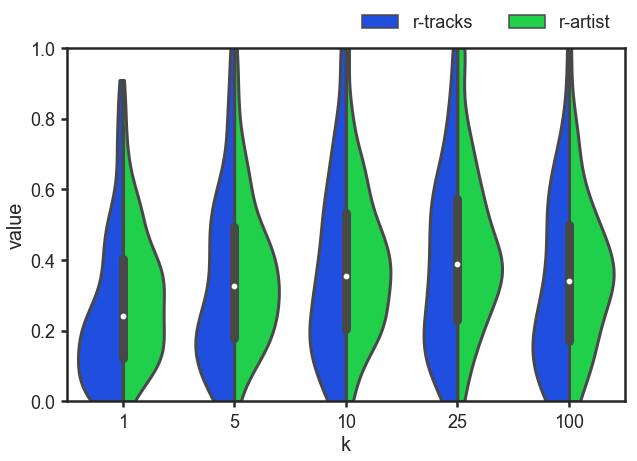

/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


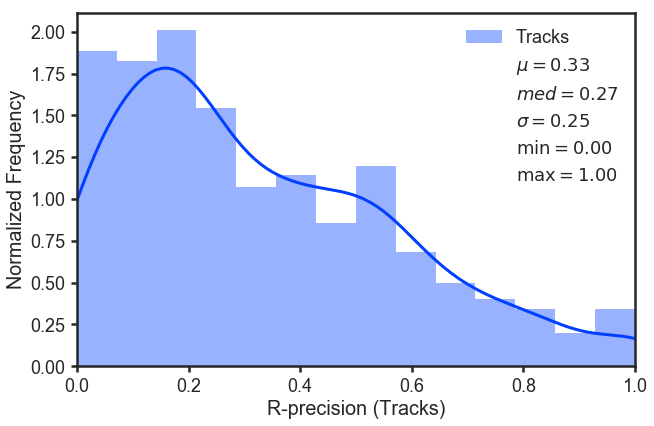

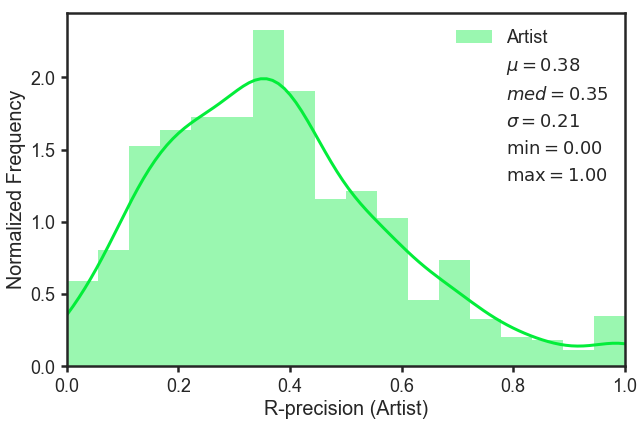

In [20]:
summ_df = summary_pooling_table(stats)
write_latex_table(summ_df,'pooling')
display(summ_df)
pooling_plots(stats)